In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline
from scipy import linalg

In [30]:
# Mount Google drive folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DIR = '/content/drive/MyDrive/Colab Notebooks/ALA'
DATA_DIR = '/content/drive/MyDrive/ForStudents/Data'

In [ ]:
# Load data
FILE = DATA_DIR + '/ecg_missing.txt'
df_ecg = pd.read_csv(FILE, header = None, names = ['ecgvalues'])
#df_ecg.head()
print(type(df_ecg['ecgvalues'].values[0]))
df_ecg['ecgvalues'] = df_ecg['ecgvalues'].astype(float)
print(type(df_ecg['ecgvalues'].values[0]))

<class 'str'>
<class 'numpy.float64'>


**Data Matrix**

Patient dataset corresponding to 4 patients and 3 features:

![Patient dataset](https://bl3302files.storage.live.com/y4mlspYO-L_1kEGpBOCUilkrcj3evQtgjGXDt6v2NgJwtsJf2OZVnwRnUht7CmW_wk8VMlMyGfhDqgRubB3pLHXAOe3r-pQ5wtYUuOqR_gsZzHWCqE2IEbhBjUZob5suLplmONyMsAjr1twDPK7eGODrKyav1dP1aX3lWx1YV0hiLvuTEZ7-GujIypTMkaSV2or?width=256&height=153&cropmode=none)

In [ ]:
df = pd.DataFrame({'HR' : [76, 74, 72, 78],
                   'BP' : [126, 120, 118, 136],
                   'Temp': [38.0, 38.0, 37.5, 37.0]})

print(df)   
print('----------')
X = np.array(df)
print(X)

   HR   BP  Temp
0  76  126  38.0
1  74  120  38.0
2  72  118  37.5
3  78  136  37.0
----------
[[ 76.  126.   38. ]
 [ 74.  120.   38. ]
 [ 72.  118.   37.5]
 [ 78.  136.   37. ]]


In [ ]:
type(X)

numpy.ndarray

In [ ]:
X.shape

(4, 3)

In [ ]:
np.array([1, 2])

array([1, 2])

In [ ]:
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

**Vectors from the data matrix**

![Patient dataset](https://bl3302files.storage.live.com/y4mTMCQdiTnIFj1IALg09CRz7pPWl0g4HpigAPbwyMmF0QNliGAgK3aEsBESo0BNFCy-0-kR6pllskO1DPVt2-76bYsQaACRWhkOebqJ545BbtWcGr1CJG72BZJPrYbQDWNAC0h1EHhpewBlORT_xtahEu-bite73OVi-4CzGeQf6GDw11H6kn72VocdC2bLAsJ?width=256&height=167&cropmode=none)

1st feature vector (heart rate) for all patients:
$$x_1 = \begin{bmatrix}76\\74\\72\\78\end{bmatrix}$$

1st patient vector for all features:
$$x^{(1)} = \begin{bmatrix}76\\126\\38\end{bmatrix}$$

In [ ]:
# Vector for 1st feature (HR)
x_1 = X[:, 0]
print(x_1)
#print(x_1.shape)
#print(x_1.reshape(-1,1))
#print(x_1.reshape(-1,1).shape)

# Vector for 2nd feature (BP)
x_2 = X[:, 1]
print(x_2)

# Vector for 1st patient
x1 = X[0, :]
print(x1)

# Vector for 2nd patient
x2 = X[1, :]
print(x2)

# Vector for 2nd patient but only 1st and 2nd features
print(X[1, 0:2])

[76. 74. 72. 78.]
[126. 120. 118. 136.]
[ 76. 126.  38.]
[ 74. 120.  38.]
[ 74. 120.]


**Components of a vector and matrix**

The components of a vector $x$ are denoted as $x_1,x_2,\ldots.$

The component in the $i$th row and $j$th column of a matrix is $X$ is represented as $X_{ij}.$

2nd patient, 1st feature (heart rate) value is $x^{(2)}_1.$

1st feature (heart rate), 2nd patient value is $\left(x_1\right)_2.$




In [ ]:
# 2nd patient vector
x2 = X[1, :]

# 1st feature (heart rate) vector
x_1 = X[:, 0]

# 2nd patient, 1st feature (heart rate) value
print(x_1[1])
print(x2[0])

# Directly from the data matrix
print(X[1, 0])

74.0
74.0
74.0


**Some commonly used vectors**

<p class="fragment roll-in">$$\underbrace{\begin{bmatrix}0\\0\\0\end{bmatrix}}_{\pmb{0}:\,\text{Zero vector}}\quad\underbrace{\begin{bmatrix}0\\0\\0\\0\\0\end{bmatrix}}_{\pmb{0}:\,\text{Zero vector}}\quad \underbrace{\begin{bmatrix}1\\0\\0\end{bmatrix}}_{e_1:\,\text{Unit vector}}\quad \underbrace{\begin{bmatrix}0\\1\\0\\0\end{bmatrix}}_{e_2:\,\text{Unit vector}}\quad \underbrace{\begin{bmatrix}1\\1\\1\\\vdots\\1\\1\end{bmatrix}}_{\pmb{1}:\,\text{ones vector}}$$</p>

**Addition and subtraction of vectors, scalar multiplication (apply operation componentwise)**

![Vector addition](https://bl3302files.storage.live.com/y4mMlnDRWzIoNKWynOZFhzhFNDlReoFxf7XwSeFwNWW8f1lu5ssj_SvgMAEN9BWiQ2F-meER7rD2an2n2tfDoWffBHE8aD_WBsL0LAbHxnIpZtZu6hNJAvZ88m746S_ktA9-h-oo108AQjkXQHkYrgJ5AUCpvKB2dipeNG1VfIK_38Q8fsq6OKD43adplgy0H1k?width=200&height=80&cropmode=none)

![Vector subtraction](https://bl3302files.storage.live.com/y4mnQkNUONVVKJJ6dCEqV9lEuP360lE0yRumSIgl9LaQH_qBqjgI9wvUd64xJ-UNIjR7wJXZyaXZ_kf1_gAB9sXjMWaMxWhSnX6zcyvVtTrCDeO1MNWzj3A1YqI5YLALK-CGCSMurNV938QLH3C2u1-BE8_addFYSeO7DmCKz5TdWGf7qtC8M9rRN26RMqpk8iu?width=200&height=80&cropmode=none)

![Scalar-vector multiplication](https://bl3302files.storage.live.com/y4mYNwLMmuKRl3sNDSo0yyXYs0KFw1LBnQCU6nAgSawanlGNgLq7Bd93DQ0ojamRpGLx_PZvnsSG-6K-3TsdDctw5sm-QxnWUHSTJGalDR4JmUp27_Hf3ESAQukZ1Jk5G16ykO7H3AKmLSQxE4vVIAtMFbCnyxtsQEfpyb_SK5jIjVtjl7yoFcBDzsRDGzo5cZM?width=200&height=80&cropmode=none)

In [ ]:
(1/60)*x_1

array([1.26666667, 1.23333333, 1.2       , 1.3       ])

In [ ]:
x1 - x2

array([2., 6., 0.])

In [ ]:
# Vector addition
print(x1 + x2)

# Vector subtraction
print(x1 - x2)

# Scalar-vector multiplication
print(0.5*(x1 + x2))

[150. 246.  76.]
[2. 6. 0.]
[ 75. 123.  38.]


**Dot Product of Vectors**

A scalar resulting from an elementwise multiplication and addition: $$a{\color{cyan}\cdot}b = {\color{red}{a_1b_1}}+{\color{green}{a_2b_2}}+\cdots+{\color{magenta}{a_nb_n}}$$

The <font color="cyan">dot</font> ${\color{cyan}\cdot}$ represents the computation of the dot product.

In [ ]:
# Unit vectors
e_1 = np.array([1, 0, 0, 0])
e_3 = np.array([0, 0, 1, 0])

# Ones vector
o = np.array([1, 1, 1, 1])

# Vector for 1st feature (heart rate)
x_1 = X[:, 0]

# Get 1st component of vector (heart rate for 1st patient)
print(x_1[0])
print(np.dot(e_1, x_1))

# Get 3rd component of vector (heart rate for 3rd patient)
print(np.dot(e_3, x_1))

# Get sum of 1st feature values (heart rate) for all patients
print(np.sum(x_1))
print(np.dot(o, x_1))

# Average of 1st feature values (heart rate)
print((1/len(x_1))*np.dot(o, x_1))
print(np.mean(x_1))

76.0
76.0
72.0
300.0
300.0
75.0
75.0


In [ ]:
print(np.array([1, 2]) * np.array([3, 4])) # Hadamard product
print(np.array([1, 2]) @ np.array([3, 4])) # Dot product
np.dot(np.array([1, 2]), np.array([3, 4])) # Dot product

[3 8]
11


11

**Norm of a vector**

A scalar representing how <font color="cyan">big a vector</font> is:$$\lVert a\rVert =\sqrt{a_1^2+a_2^2+\cdots+a_n^2} = \sqrt{a\cdot a}$$				
<p class="fragment">The <font color="cyan">symbol</font> ${\color{cyan}{\lVert\,\lVert}}$ represents the norm of a vector</p>	

![Norm of a vector](https://bl3302files.storage.live.com/y4m8A4FYuLT9fy5RKHMEsnS-vKtnF2AHO9UTNerw_A84S_kM8U2FkhLb1-9O-_hN_aI0WWflvQS0kXTSG_K06nDWj9pzLnFw1S0hSrmKQw_dJdxW5r2k5OlqhqmeFoKKZDdivpoudbm6my5YZHU5RKMWBB39Fu5EEVQ7hfqjRuBhqoYkSmP0fbRLJY-XKsMCJRj?width=256&height=62&cropmode=none)

![Geometry of vector](https://bl3302files.storage.live.com/y4mTwTyJtDFs8AJR9CbNJCrCPk3413w4UWANehYJyao_43H2CyM90kdttDdDqiURZjtw57BgL34bmpsrrazm7r-Re31BHxH04LEeXTU85-TLXGjotJGGoqzCH-J_nXhARQdoHQ5J450Rw-fq30GMbCjeDWz9kf12a7cmjU73fr6gfROSrsAgI7GMHlusSxljDFe?width=360&height=100&cropmode=none)

In [ ]:
# Norm of the 1st feature (heart rate) vector
print(np.linalg.norm(x_1))
print(np.sqrt(np.dot(x_1, x_1)))

150.06665185843255
150.06665185843255


**Root Mean Square (RMS) value of a vector**

A scalar representing the <font color="cyan">typical absolute value</font> of an element: $$\text{rms}(a)=\sqrt{\frac{a_1^2+a_2^2+\cdots+a_n^2}{n}} = \frac{\lVert a\rVert}{\sqrt{n}}$$
<p class="fragment">The <font color = "cyan">rms value</font> of the vector $\begin{bmatrix}1\\-1\\-1\\1\end{bmatrix}$ is ${\color{cyan}1}$ whereas the <font color="green">avg($a$)</font> is ${\color{green}0}$.</p>	

In [ ]:
# RMS value of the 1st feature (heart rate) vector
print(np.linalg.norm(x_1)/np.sqrt(len(x_1)))

# Compare with the average of the 1st feature (heart rate) vector
print(np.mean(x_1))

print(x_1)

75.03332592921628
75.0
[76. 74. 72. 78.]


**Deviation from the average**

The vector $a-\text{avg}(a)\mathbf{1}$ is called the de-meaned version of $a.$

![Demeaned vector](https://bl3302files.storage.live.com/y4mRZeCpRTmxCVjlTBh63SSC-9ykIfmf-ZvIaXrp6prd1XpSPT0RhhaQ1j0vFp9lpKPaZtL8S1CSa64Bsw34x2_ncg1dAwBjR5lt6J8qOVqORlZIOw4gtOu0IIRHVbP3Zy4fZDeIzn8mgHFCc5y75W4PDkq0mhs-6VTSULUZQSefLhbTlv04pY_nAjg-rfyQ5jl?width=400&height=200&cropmode=none)

In [ ]:
# Calculate the de-meaned heart rate vector
x_1m = x_1 - np.mean(x_1)
print(x_1m)

[ 1. -1. -3.  3.]


**Standard devitation of a vector**

A measure of how much the <font color="cyan">elements of a vector typically deviate from their average value</font>
<p class="fragment">$$\text{std}(x) = \sqrt{\frac{\left[x_1-\text{avg}(x)\right]^2+\cdots+\left[x_n-\text{avg}(x)\right]^2}{n}} = \frac{1}{\sqrt{n}}\sqrt{(x-\text{avg}(x)\mathbf{1})\cdot(x-\text{avg}(x)\mathbf{1})}$$</p>
<ul>
<li class="fragment roll-in">It can be shown that standard deviation of a vector $x$ is the RMS value of the <font color ="magenta">de-meaned</font> vector ${\color{magenta}{x-\text{avg}(x)\pmb{1}}}$ represented as ${\color{magenta}{x_m}}$</li>		
<li class="fragment roll-in">Standard deviation of a vector is small when its entries are nearly the same</li>	
<li class="fragment roll-in">For any vector $x$, ${\color{red}{\text{rms}(x)^2}} = {\color{green}{\text{avg}(x)^2}}+{\color{yellow}{\text{std}(x)^2}}$</li>
</ul>	

In [ ]:
# Standard deviation of the 1st feature (heart rate) vector

In [ ]:
# Set option to print the entire dataframe
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [ ]:
# Simulate a patient dataset
#np.random.seed(100)
nsamples = 10
df = pd.DataFrame({'Heart Rate (BPM)' : np.round(np.random.normal(74, 4, nsamples)),
                   'Blood Pressure (mm Hg)' : np.round(np.random.normal(126, 8, nsamples))})
print(df)

   Heart Rate (BPM)  Blood Pressure (mm Hg)
0              73.0                   132.0
1              75.0                   140.0
2              75.0                   105.0
3              71.0                   125.0
4              70.0                   127.0
5              80.0                   128.0
6              77.0                   123.0
7              73.0                   118.0
8              76.0                   124.0
9              69.0                   135.0


Text(0.5, 1.0, 'Heart Rate vs. Blood Pressure')

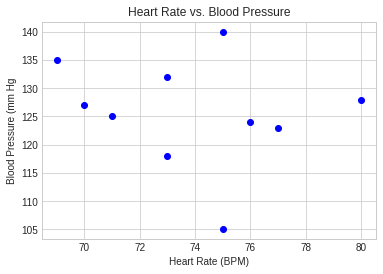

In [ ]:
# How are the heart rate and blood pressure values related?
# Scatter plot between heart rate (BPM) and blood pressure (mm Hg)
a = df['Heart Rate (BPM)']
b = df['Blood Pressure (mm Hg)']
fig, ax = plt.subplots(1)
ax.scatter(a, b, marker = 'o', color = 'blue')
ax.set_xlabel('Heart Rate (BPM)')
ax.set_ylabel('Blood Pressure (mm Hg')
ax.set_title('Heart Rate vs. Blood Pressure')
#ax.set_xlim([0, np.max(a)])
#ax.set_ylim([0, np.max(b)])

In [ ]:
print(np.std(np.array(a)))

3.2078029864690882


In [ ]:
# Add meaned-centred features to the dataframe
df['Mean-centred Heart Rate (BPM)'] = a - np.mean(a)
df['Mean-centred Blood Pressure (mm Hg)'] = b - np.mean(b)
print(df)

   Heart Rate (BPM)  Blood Pressure (mm Hg)  Mean-centred Heart Rate (BPM)  \
0              73.0                   132.0                           -0.9   
1              75.0                   140.0                            1.1   
2              75.0                   105.0                            1.1   
3              71.0                   125.0                           -2.9   
4              70.0                   127.0                           -3.9   
5              80.0                   128.0                            6.1   
6              77.0                   123.0                            3.1   
7              73.0                   118.0                           -0.9   
8              76.0                   124.0                            2.1   
9              69.0                   135.0                           -4.9   

   Mean-centred Blood Pressure (mm Hg)  
0                                  6.3  
1                                 14.3  
2                 

Text(0.5, 1.0, 'Mean Centred Plot of Heart Rate vs. Blood Pressure')

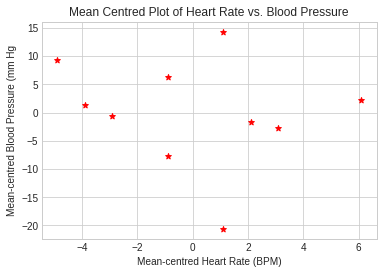

In [ ]:
# Scatter plot between meaned-centred heart rate (BPM) and meaned-centred blood pressure (mm Hg)
a_mc = df['Mean-centred Heart Rate (BPM)']
b_mc = df['Mean-centred Blood Pressure (mm Hg)']
fig, ax = plt.subplots(1)
ax.scatter(a_mc, b_mc, marker = '*', color = 'red')
ax.set_xlabel('Mean-centred Heart Rate (BPM)')
ax.set_ylabel('Mean-centred Blood Pressure (mm Hg')
ax.set_title('Mean Centred Plot of Heart Rate vs. Blood Pressure')

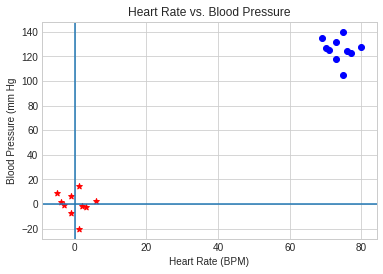

In [ ]:
# Scatter plot both versions
fig, ax = plt.subplots(1)
ax.scatter(a, b, marker = 'o', color = 'blue')
ax.scatter(a_mc, b_mc, marker = '*', color = 'red')
ax.set_xlabel('Heart Rate (BPM)')
ax.set_ylabel('Blood Pressure (mm Hg')
ax.set_title('Heart Rate vs. Blood Pressure')
plt.axvline(0)
plt.axhline(0)

In [ ]:
# How does a typical component of the mean-centered
# heart rate vector look like in absolute value?
np.std(a)

3.2078029864690882

In [ ]:
# Add standardize features to the dataframe
df['Standardize Heart Rate'] = (a - np.mean(a)) / np.std(a)
df['Standardized Blood Pressure'] = (b - np.mean(b)) / np.std(b)
print(df)

   Heart Rate (BPM)  Blood Pressure (mm Hg)  Mean-centred Heart Rate (BPM)  \
0              73.0                   132.0                           -0.9   
1              75.0                   140.0                            1.1   
2              75.0                   105.0                            1.1   
3              71.0                   125.0                           -2.9   
4              70.0                   127.0                           -3.9   
5              80.0                   128.0                            6.1   
6              77.0                   123.0                            3.1   
7              73.0                   118.0                           -0.9   
8              76.0                   124.0                            2.1   
9              69.0                   135.0                           -4.9   

   Mean-centred Blood Pressure (mm Hg)  Standardize Heart Rate  \
0                                  6.3               -0.280566   
1        

In [ ]:
# User-defined function to make a component plot of a vector
def plotveccomp(x, name = None, axis = None):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, color = 'black', marker = 'o') 
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue') 
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.set_xlabel('Patient #', fontsize = 16)
  ax.set_ylabel(name, fontsize = 16)
  ax.set_title(' '.join(name.split()[0:2]) +  ' Vector', fontsize = 14)

In [ ]:
name = 'Heart Rate (BPM)'
' '.join(name.split()[0:2]) + ' Vector'

'Heart Rate Vector'

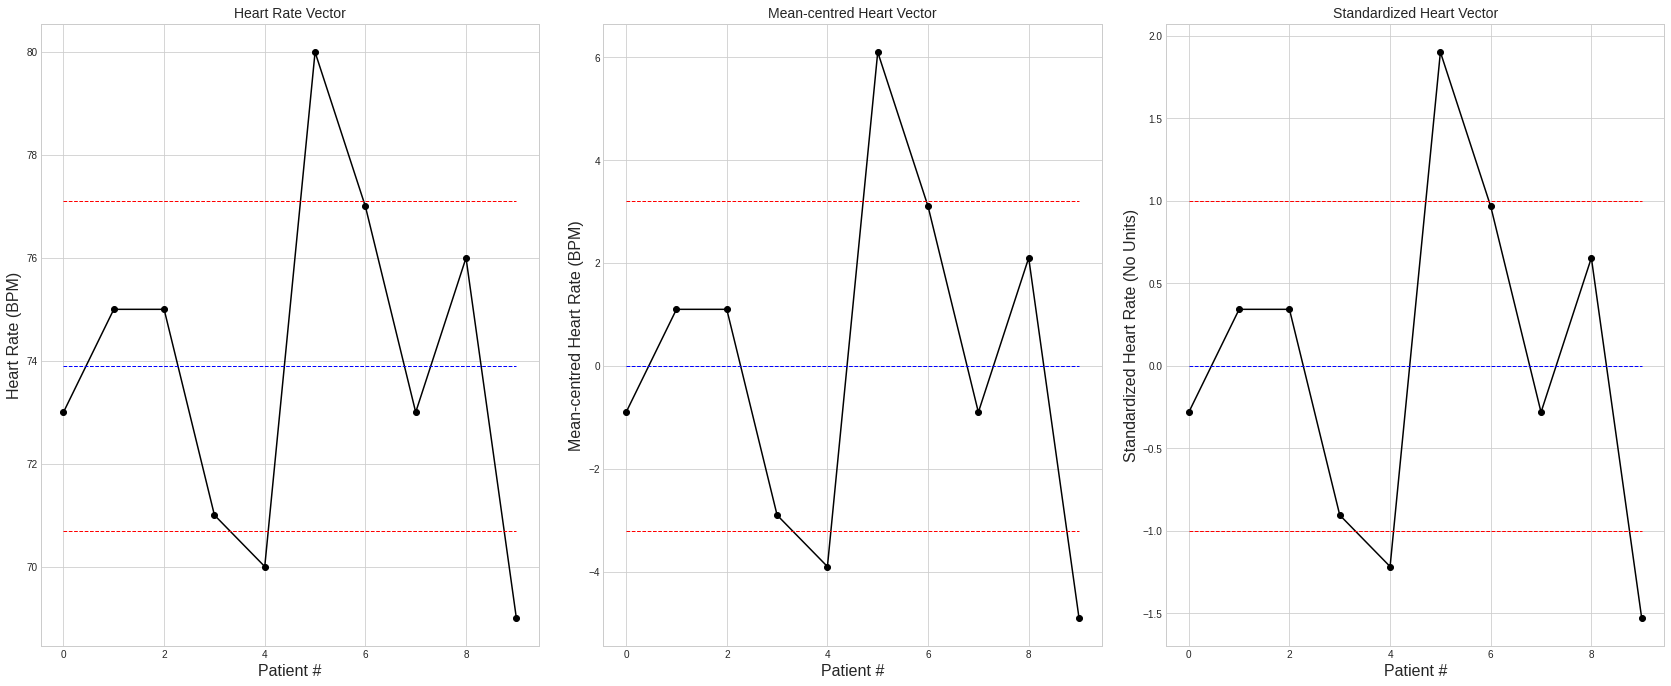

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24,10))
fig.tight_layout(pad = 4.0)
plotveccomp(a, 'Heart Rate (BPM)', ax1)
plotveccomp(a - np.mean(a), 'Mean-centred Heart Rate (BPM)', ax2)
plotveccomp((a - np.mean(a))/np.std(a), 'Standardized Heart Rate (No Units)', ax3)
plt.savefig('stdofvec.png')

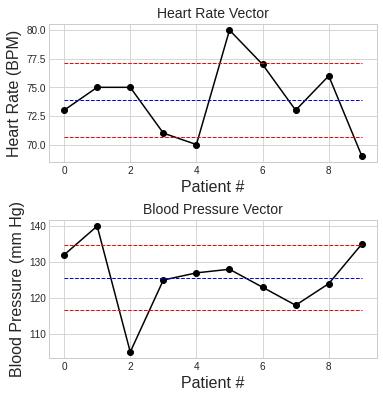

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(a, 'Heart Rate (BPM)', ax1)
plotveccomp(b, 'Blood Pressure (mm Hg)', ax2)

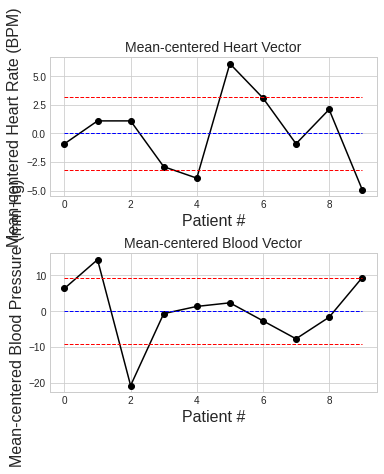

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(a_mc, 'Mean-centered Heart Rate (BPM)', ax1)
plotveccomp(b_mc, 'Mean-centered Blood Pressure (mm Hg)', ax2)

In [ ]:
print(np.dot(a, b)) # Dot-product between the original vectors do not reveal much
print(np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))) # Recall angle(a,b) acos(aT*b/(||a||*||b||))
print(np.dot(a_mc, b_mc)) # Covariance between a and b
print(np.dot(a_mc, b_mc) / (np.linalg.norm(a_mc) * np.linalg.norm(b_mc))) # Correlation coefficient
print(np.corrcoef(a, b))

92840.0
0.9958653543095027
-52.3
-0.17830556165348763
[[ 1.         -0.17830556]
 [-0.17830556  1.        ]]


In [ ]:
def plotvector(x, name = None, axis = None):
  ax = axis or plt.gca()
  component_index = range(0,len(a)) 
  ax.plot(component_index, x, color = 'blue', marker = 'o')
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color = 'red')
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color = 'green')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color = 'green')
  ax.set_xticks(np.arange(0, np.max(component_index), step = 2))
  ax.set_ylabel('Return') 
  ax.set_xlabel('Year #') 
  ax.set_title(name)

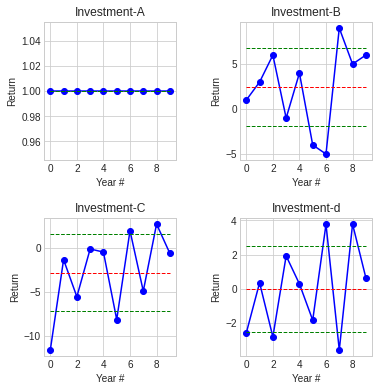

In [ ]:
# Generate four return vectors
nsamples = 10
a = np.round(np.random.normal(1, 0, nsamples))
b = np.round(np.random.normal(2, 4, nsamples))
c = np.round(np.random.normal(2, 4, nsamples)) + np.random.uniform(-10, 10, nsamples)
d = np.round(np.random.normal(2, 4, nsamples)) - np.random.uniform(-3, 3, nsamples)
fig, axes = plt.subplots(2, 2, figsize = (6, 6))
ax1, ax2, ax3, ax4 = axes.flatten()
fig.tight_layout(pad = 4.0)
plotvector(a, 'Investment-A', ax1) 
plotvector(b, 'Investment-B', ax2)
plotvector(c, 'Investment-C', ax3)
plotvector(d, 'Investment-d', ax4)
# Plot a graph with risk on mean return on x-axis and standard deviation on the y-axis for the 4 types of investment

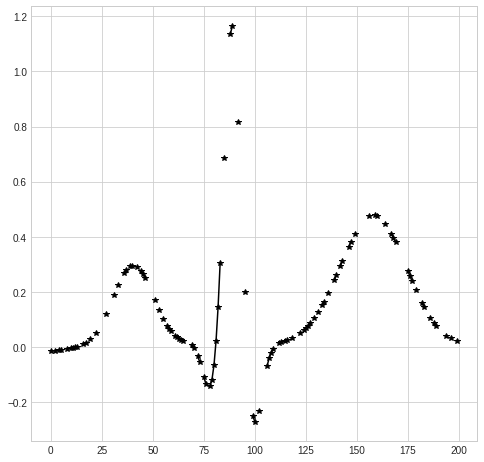

In [ ]:
# Component plot of the ecg signal
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
component_index = range(0, len(df_ecg['ecgvalues']))
ax.plot(component_index, df_ecg['ecgvalues'], color = 'black', marker = '*')

In [ ]:
# Extract the indices corresponding to the missing ECG values
t_unknown = df_ecg[df_ecg['ecgvalues'].isnull()].index

# Extract the indices corresponding to the known ECG values
t_known = df_ecg[~df_ecg['ecgvalues'].isnull()].index

In [ ]:
# Build a vector of known ecg_signal values
x_known = df_ecg[~df_ecg['ecgvalues'].isnull()].values
print(x_known)

[[-1.4374358e-02]
 [-1.2637355e-02]
 [-1.0812403e-02]
 [-9.8533655e-03]
 [-6.5482859e-03]
 [-3.7513235e-03]
 [-2.0578644e-03]
 [-9.4258541e-05]
 [ 2.2061528e-03]
 [ 1.1933259e-02]
 [ 1.6432082e-02]
 [ 2.7900408e-02]
 [ 5.2836413e-02]
 [ 1.1955439e-01]
 [ 1.8927629e-01]
 [ 2.2432987e-01]
 [ 2.6819605e-01]
 [ 2.7884396e-01]
 [ 2.9247613e-01]
 [ 2.9511999e-01]
 [ 2.9169886e-01]
 [ 2.7691699e-01]
 [ 2.6566740e-01]
 [ 2.5236573e-01]
 [ 1.6913212e-01]
 [ 1.3481272e-01]
 [ 1.0374964e-01]
 [ 7.7566183e-02]
 [ 6.6488692e-02]
 [ 5.6786325e-02]
 [ 4.1356533e-02]
 [ 3.5450843e-02]
 [ 3.0563746e-02]
 [ 2.6503058e-02]
 [ 2.3035374e-02]
 [ 7.1758438e-03]
 [-1.8258006e-03]
 [-3.2324290e-02]
 [-5.4580566e-02]
 [-1.0887994e-01]
 [-1.3214744e-01]
 [-1.4281210e-01]
 [-1.1800725e-01]
 [-6.4454915e-02]
 [ 2.2472551e-02]
 [ 1.4558586e-01]
 [ 3.0343132e-01]
 [ 6.8578156e-01]
 [ 1.1362935e+00]
 [ 1.1638875e+00]
 [ 8.1561486e-01]
 [ 2.0040482e-01]
 [-2.4972163e-01]
 [-2.6991059e-01]
 [-2.3291409e-01]
 [-6.91888

In [ ]:
I = np.eye(len(df_ecg))
S1 = I[:, t_known]
S2 = I[:, t_unknown]

In [ ]:
# Build the second-difference matrix D
n = 4
a = 1*np.ones(n-1)
b = -2*np.ones(n)
print(b)

[-2. -2. -2. -2.]


In [ ]:
-2*np.ones(4)

array([-2., -2., -2., -2.])

In [ ]:
# Build the second difference matrx D
n = 6 #number of rows
#np.diag([1,2,3,4],2)
a = 1*np.ones(n-1)
b = -2*np.ones(n)
print(np.diag(a,-1) + np.diag(b) + np.diag(a,1))

[[-2.  1.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  1. -2.]]


In [ ]:
# Build the second difference matrx D
n = len(df_ecg) #number of rows
#np.diag([1,2,3,4],2)
a = 1*np.ones(n-1)
b = -2*np.ones(n)
D=np.diag(a,-1) + np.diag(b) + np.diag(a,1)
#print(D)
#print('---------*--------*-------')
D=D[1:-1,:]
#print(D[1:-1,:])
print(D.shape)

(198, 200)


In [ ]:
A=np.dot(D,S2)
b=np.dot(np.dot(-D,S1),x_known)
v=linalg.lstsq(A,b)

In [ ]:
print(v[0].flatten().shape)
v1=v[0].flatten()
df_ecg.loc[t_unknown,'ecgvalues']=v1

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
component_index = range(0, len(df_ecg['ecgvalues']))
ax.plot(component_index, df_ecg['ecgvalues'], color = 'black', marker = '*')

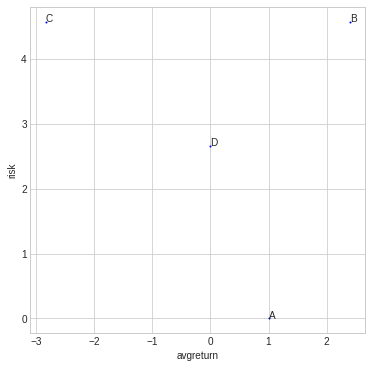

In [ ]:
sdev = lambda x: np.linalg.norm(x-np.mean(x)) / np.sqrt(len(x)-1)
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
avgreturn = np.mean([a ,b, c, d], axis = 1)
risk = list(map(sdev, [a ,b, c, d]))
ax.scatter(avgreturn, risk, s = 1.0, color = 'blue', marker = 'o')
ax.set_xlabel('avgreturn') 
ax.set_ylabel('risk') 
stock = ['A', 'B', 'C', 'D']
for i, txt in enumerate(stock):
    ax.annotate(txt, (avgreturn[i], risk[i]))

In [ ]:
nsamples=100
a = np.round(np.random.normal(1, 2, nsamples))
print(np.mean(a)+np.std(a))
print(np.mean(a))
print(np.std(a))

3.0069339704565783
0.97
2.036933970456578


In [ ]:
print(a)

[ 2. -0.  1.  2.  4. -0.  1. -1. -1.  2.  3.  1.  1.  0.  4.  1. -1.  1.
  1. -3.  6. -2.  3.  1.  4. -0. -2. -3.  1. -0.  2.  0.  0.  2.  3.  4.
  1. -0. -2.  3.  2.  0. -0.  2.  3.  2.  4.  0.  0.  0.  0.  3.  1.  0.
  1. -2. -3. -1.  2.  3.  3.  0.  3. -1.  2. -2. -2.  6.  2.  4.  1.  0.
  3. -2.  3.  5.  3.  3.  1.  1.  4.  1.  1.  1. -2.  1. -2. -0.  0. -1.
 -2.  3. -0. -0. -1.  3. -1.  3. -3.  3.]


In [ ]:
(b-np.mean(b))/sdev(b)

array([-0.30599113,  0.13113906,  0.78683434, -0.74312132,  0.34970415,
       -1.39881661, -1.6173817 ,  1.44252963,  0.56826925,  0.78683434])

In [ ]:
cutoff = 1.4
print((b-np.mean(b))/sdev(b))
outliers=np.abs((b-np.mean(b))/sdev(b)) >= cutoff
print(b[outliers])
print(np.where(b))
print(np.where(outliers))

[-0.30599113  0.13113906  0.78683434 -0.74312132  0.34970415 -1.39881661
 -1.6173817   1.44252963  0.56826925  0.78683434]
[-5.  9.]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)
(array([6, 7]),)
